<a href="https://colab.research.google.com/github/MathewsJosh/mecanica-estruturas-ufjf/blob/main/%5BMAC023%5D_Trabalho_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAC023 - Mecânica das Estruturas**
# ME-01 - Primeira Avaliação de Conhecimentos


**ATENÇÃO:** Não edite este arquivo!!! Faça uma cópia deste arquivo para o seu Drive. Para isso, no próprio colab, vá em **File -> Save a copy in Drive**

---

Alunos:

Brian Maia <br>
Mathews Edwirds <br>

# Condições Gerais

Esta avaliação tem como objetivo avaliar os conhecimentos adquiridos na primeira parte da disciplina de Mecânica das Estruturas.


---

As condicões abaixo devem ser observadas: 

1. Serão formadas equipes e cada uma delas com no mínimo **2** e no máximo **3** integrantes. 

2. A avaliação será realizada por meio da entrega de uma cópia deste notebook com as soluções desenvolvidas até a data estipulada de entrega.


3. Da entrega da avaliação.
  * Os documentos necessários para a entrega do trabalho são (1) os códigos  desenvolvidos pela equipe e (2) vídeo com a descrição da solução. 
  * A equipe deve usar este modelo de notebook para desenvolver os códigos. 
  * Os códigos podem ser desenvolvidos combinado a linguagem LaTeX e computação simbólica ou computação numérica quando necessário.
  * Os gráficos necessários para a apresentação da solução devem estar embutidos no notebook.

4. Da distribuição das questões.
  * A quantidade de questões será a mesma para cada grupo. 
  * Serão atribuídas as mesmas questões para todos os grupos.
  * A pontuacão referente a cada questão será igualitária e o valor total da avaliação será 100 pontos.

5. As equipes devem ser formadas até às **23:59 horas o dia 10/12/2021** por meio do preenchimento da planilha [[MAC023] Formação das Equipes](https://docs.google.com/spreadsheets/d/1Dlftymao970nnrE4mu958iP8nMqKqSuhHiiLH91BKpQ/edit?usp=sharing).

6. A formação das equipes pode ser acompanhada arquivo indicado acima. Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 1 (A1, B1, C1, e assim por diante). O arquivo está aberto para edição e pode ser alterado pelos alunos até a data estipulada.

7. Equipes formadas após a data estabelecida para a formação das equipes terão a nota da avaliação multiplicada por um coeficiente de **0.80**.

8. A equipe deve indicar no arquivo de indicação de equipes um responsável pela entrega do projeto. 
  * Somente o responsável pela entrega deve fazer o upload do arquivo na plataforma

9. A entrega dos projetos deve ocorrer até às **23:59 do dia 21/12/2021** na plataforma da disciplina pelo responsável pela entrega. 
  * Caso a entrega seja feita por outro integrante diferente daquele indicado pela pela equipe a avaliação será desconsiderada e não será corrigida até que a a condição de entrega seja satisfeita.

10. Quaisquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.


# Questão Q1
---
Considere a estrutura mostrada abaixo.

As barras são feitas com um material com módulo de elasticidade E e têm seções transversais com área A.

---

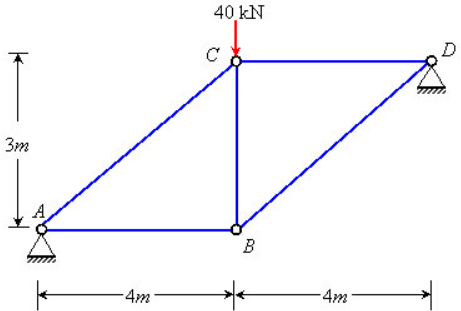


---

Recorde-se que as condições de compatibilidade entre deslocamentos e deformações são condições geométricas que devem ser satisfeitas para garantir que a estrutura, ao se deformar, permaneça contínua (sem vazios ou sobreposição de pontos) e compatível com seus vínculos externos.


## Implementação
---
 
Implemente um modelo considerando as condições básicas de análise estrutural e realize as seguintes entregas:
 
a. (10 pontos) Escreva as posições dos nós nas configurações indeformada e deformada.

b. (10 pontos) Determine as condições de compatibilidade para a estrutura na configuração deformada. Escreva as equações das deformações nas barras em função 

* (a) dos deslocamentos nos nós livres para se deslocar e 
* (b) as informações geométricas da estrutura. 

Use uma notação vetorial para as condições de compatibilidade.

c. (20 pontos) Linearize as condições de compatibilidade em função dos deslocamentos. Reescreve-as usando a matriz jacobiana da forma vetorial das condições de compatibilidade. Neste caso, a transformação linear representada pela Jacobiana ${\bf J(p)}$ é a aproximação linear da função vetorial ${\bf f(u)}$ nas proximidades do ponto ${\bf p}$, e pode ser representada pela expressão $$ {\bf f(u)} - {\bf f(p)} = {\bf J(p)} {\bf (u-p)} $$
onde ${\bf u}$ é um ponto de interesse na vizinhança de ${\bf p}$. 

d. (10 pontos) Responda à seguinte questão: Qual a hipótese envolvida no processo de linearização e por que a linearização é necessária?

e. (20 pontos) Escreva as condições de equilíbrio na configuração **indeformada**. Use uma notação vetorial para as equações de equilíbrio.

f. (10 pontos) Usando as relações constitutivas, reescreva as forças internas em função dos deslocamentos e reescreva as equações de equilíbrio em função dos deslocamentos.

g. (10 pontos) Resolva o sistema de equações de equilíbrio para os deslocamentos. Assuma valores unitários para as áreas das seções transversais (A). O módulo de elasticidade (E) tem valor igual 150000 N/m$^2$.

h. (10 pontos) Compare o resultado encontrado com o pacote anastruct.
 
---


#Alternativa A) 
Escreva as posições dos nós nas configurações indeformada e deformada.

In [ ]:
# Importa as bibliotecas gráficas, numéricas e de computação simbólica
import pylab as pl
import numpy as np
import sympy as sp

sp.init_printing(use_latex='mathjax')
a,b,l,P,u= sp.var('a b l P u', real=True, positive=True)
P=-40000

In [ ]:
#--# Posição dos nós na configuração indeformada#--
conf_indeformada=sp.Matrix([[0,0], [a,0], [a,b], [2*a,b]]) # A, B, C, D

print("Configuração Indeformada")
conf_indeformada

Configuração Indeformada


⎡ 0   0⎤
⎢      ⎥
⎢ a   0⎥
⎢      ⎥
⎢ a   b⎥
⎢      ⎥
⎣2⋅a  b⎦

In [ ]:
#--# Posição dos nós na configuração deformada #--
desloc_xb, desloc_yb, desloc_xc, desloc_yc = sp.var('desloc_xb desloc_yb desloc_xc desloc_yc', real=True, positive=True)
matriz_deslocamentos = sp.Matrix([desloc_xb, desloc_yb, desloc_xc, desloc_yc])

# Matrizes de posições e deslocamentos para a configuração deformada
conf_deformada = conf_indeformada + sp.Matrix([
[0,0],     # A           
[desloc_xb, -desloc_yb],     # B           
[desloc_xc, -desloc_yc],     # C           
[0,0],   # D                                                       
])

print("Matrizes de posições e deslocamentos para a configuração deformada")
conf_deformada, matriz_deslocamentos

Matrizes de posições e deslocamentos para a configuração deformada


⎛⎡      0              0      ⎤  ⎡desloc_xb⎤⎞
⎜⎢                            ⎥  ⎢         ⎥⎟
⎜⎢a + desloc_xb   -desloc_yb  ⎥  ⎢desloc_yb⎥⎟
⎜⎢                            ⎥, ⎢         ⎥⎟
⎜⎢a + desloc_xc  b - desloc_yc⎥  ⎢desloc_xc⎥⎟
⎜⎢                            ⎥  ⎢         ⎥⎟
⎝⎣     2⋅a             b      ⎦  ⎣desloc_yc⎦⎠

In [ ]:
identifica_barra = [[0, 2], [0, 1], [2, 1], [2, 3], [1, 3]] #AC, AB, CB, CD, BD

print("Identificação da barra")
print("  AC,    AB,    CB,    CD,    BD")
identifica_barra

Identificação da barra
  AC,    AB,    CB,    CD,    BD


[[0, 2], [0, 1], [2, 1], [2, 3], [1, 3]]

#Alternativa B) 

Determine as condições de compatibilidade para a estrutura na configuração deformada. Escreva as equações das deformações nas barras em função

* (a) dos deslocamentos nos nós livres para se deslocar e <br>
* (b) as informações geométricas da estrutura.

Use uma notação vetorial para as condições de compatibilidade.

In [ ]:
epsilon = []
for pos, nos in enumerate(identifica_barra):
  # Auxiliares para salvar o valor dos nós barras
  primeiro_no_lista = nos[0]
  ultimo_no_lista = nos[1]
  # Cálculo das condições de compatibilidade
  comp_f = conf_deformada[ultimo_no_lista,:] - conf_deformada[primeiro_no_lista,:]
  comp_i = conf_indeformada[ultimo_no_lista,:] - conf_indeformada[primeiro_no_lista,:]
  epsilon.insert(pos, ((comp_f.norm() - comp_i.norm())/comp_i.norm()))

# Lista de compatibilidades
print("Condições de compatibilidade para a estrutura deformada em forma de lista e matriz")
print("\n\t\t\tAC, \t\t\t\t\tAB, \t\t\t\t\t\tCB, \t\t\t\t\tCD, \t\t\t\t\tBD")
display(epsilon)
print("\n")

# Conversão da lista de condições de compatibilidade para uma matriz de compatibilidade
matriz_epsilon=[]
for item in epsilon:
  matriz_epsilon.append(sp.Matrix([item]))
matriz_epsilon = sp.Matrix(matriz_epsilon)
display(matriz_epsilon)

Condições de compatibilidade para a estrutura deformada em forma de lista e matriz

			AC, 					AB, 						CB, 					CD, 					BD


⎡     _________      _____________________________________          __________
⎢    ╱  2    2      ╱                2                  2          ╱          
⎢- ╲╱  a  + b   + ╲╱  (a + desloc_xc)  + (b - desloc_yc)    -a + ╲╱  desloc_yb
⎢─────────────────────────────────────────────────────────, ──────────────────
⎢                          _________                                          
⎢                         ╱  2    2                                           
⎣                       ╲╱  a  + b                                            

_____________________          _______________________________________________
2                  2          ╱                        2                      
  + (a + desloc_xb)    -b + ╲╱  (desloc_xb - desloc_xc)  + (b + desloc_yb - de
─────────────────────, ───────────────────────────────────────────────────────
 a                                                     b                      
                                                   

⎡         _________      _____________________________________    ⎤
⎢        ╱  2    2      ╱                2                  2     ⎥
⎢    - ╲╱  a  + b   + ╲╱  (a + desloc_xc)  + (b - desloc_yc)      ⎥
⎢    ─────────────────────────────────────────────────────────    ⎥
⎢                              _________                          ⎥
⎢                             ╱  2    2                           ⎥
⎢                           ╲╱  a  + b                            ⎥
⎢                                                                 ⎥
⎢                     _______________________________             ⎥
⎢                    ╱          2                  2              ⎥
⎢             -a + ╲╱  desloc_yb  + (a + desloc_xb)               ⎥
⎢             ───────────────────────────────────────             ⎥
⎢                                a                                ⎥
⎢                                                                 ⎥
⎢        _______________________________________

#Alternativa C)
Linearize as condições de compatibilidade em função dos deslocamentos. Reescreva-as usando a matriz jacobiana da forma vetorial das condições de compatibilidade. Neste caso, a transformação linear representada pela Jacobiana ${\bf J(p)}$ é a aproximação linear da função vetorial ${\bf f(u)}$ nas proximidades do ponto ${\bf p}$, e pode ser representada pela expressão $$ {\bf f(u)} - {\bf f(p)} = {\bf J(p)} {\bf (u-p)} $$
onde ${\bf u}$ é um ponto de interesse na vizinhança de ${\bf p}$. 

$ {\bf f(u)} - {\bf f(p)} = {\bf J(p)} {\bf (u-p)} \Rightarrow$ <br>
$ {\bf f(u)} = {\bf J(p)} {\bf (u-p) + {\bf f(p)}} \Rightarrow$ <br>
$ {\bf f(u)} = {\bf J(0)} {\bf (u-0)} + {\bf f(0)}$

In [ ]:
from sympy import latex, Eq                               #Linearização das condições de compatibilidade

Jacobiano = matriz_epsilon.jacobian(matriz_deslocamentos) #Calculo do Jacobiano
print("J(p) = ")
display(Jacobiano)

print("\nJ(0) = ")                                        #Substituição das posições iniciais no jacobiano
Jacobiano_0 = Jacobiano.subs([(desloc_xb, 0), (desloc_xc, 0), (desloc_yb, 0), (desloc_yc, 0)])
display(Jacobiano_0)

print("\nf(0) = ")                                        #Função vetorial no ponto inicial
funcaoVetorial = matriz_epsilon.subs([(desloc_xb, 0), (desloc_xc, 0), (desloc_yb, 0), (desloc_yc, 0)])
display(funcaoVetorial)

print("\nf(u) = ")                                        #Transformação linear
epsilon_linearizado = Jacobiano_0 * matriz_deslocamentos + funcaoVetorial
display(epsilon_linearizado)

J(p) = 


⎡                                                                             
⎢                              0                                              
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                        a + desloc_xb                                        
⎢             ────────────────────────────────────                            
⎢                  _______________________________                            
⎢                 ╱          2                  2                             
⎢             a⋅╲╱  desloc_yb  + (a + desloc_xb)                              
⎢                                                                             
⎢                    desloc_xb - desloc_xc          


J(0) = 


⎡                     a       -b   ⎤
⎢   0        0     ───────  ───────⎥
⎢                   2    2   2    2⎥
⎢                  a  + b   a  + b ⎥
⎢                                  ⎥
⎢   1                              ⎥
⎢   ─        0        0        0   ⎥
⎢   a                              ⎥
⎢                                  ⎥
⎢            1                -1   ⎥
⎢   0        ─        0       ───  ⎥
⎢            b                 b   ⎥
⎢                                  ⎥
⎢                    -1            ⎥
⎢   0        0       ───       0   ⎥
⎢                     a            ⎥
⎢                                  ⎥
⎢  -a        b                     ⎥
⎢───────  ───────     0        0   ⎥
⎢ 2    2   2    2                  ⎥
⎣a  + b   a  + b                   ⎦


f(0) = 


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


f(u) = 


⎡ a⋅desloc_xc   b⋅desloc_yc ⎤
⎢ ─────────── - ─────────── ⎥
⎢    2    2        2    2   ⎥
⎢   a  + b        a  + b    ⎥
⎢                           ⎥
⎢         desloc_xb         ⎥
⎢         ─────────         ⎥
⎢             a             ⎥
⎢                           ⎥
⎢   desloc_yb   desloc_yc   ⎥
⎢   ───────── - ─────────   ⎥
⎢       b           b       ⎥
⎢                           ⎥
⎢        -desloc_xc         ⎥
⎢        ───────────        ⎥
⎢             a             ⎥
⎢                           ⎥
⎢  a⋅desloc_xb   b⋅desloc_yb⎥
⎢- ─────────── + ───────────⎥
⎢     2    2        2    2  ⎥
⎣    a  + b        a  + b   ⎦

# Alternativa D) 
Responda à seguinte questão: Qual a hipótese envolvida no processo de linearização e por que a linearização é necessária?

R - A hipótese envolvida é de que as deformações são pequenas. Dito isso, o processo de linearização é importante para facilitar os cálculos, já que passamos a usar equações lineares ao invés de equações não lineares. De modo geral, o objetivo é simplificar a resolução do problema. 

#Alternativa E)

Escreva as condições de equilíbrio na configuração indeformada. Use uma notação vetorial para as equações de equilíbrio.

Considerando que $ \sum Y = 0 $ e $ \sum X = 0 $, temos:

In [ ]:
Nac, Nab, Ncb, Ncd, Nbd = sp.var('N_{ac} N_{ab} N_{cb} N_{cd} N_{bd}', real=True, positive=True)
Normais_nos = [Nac, Nab, Ncb, Ncd, Nbd]

#Condições de equilibrio para o eixo X
BX = Nbd*(a/sp.sqrt(a**2 + b**2)) - Nab
CX = Ncd - Nac*a/(sp.sqrt(a**2 + b**2))

#Condições de equilibrio para o eixo Y
BY = Ncb + Nbd*b/(sp.sqrt(a**2 + b**2))
CY = - Ncb - Nac*b/(sp.sqrt(a**2 + b**2)) + P

print("Condições de equilibrio para os pontos B e C das direções X e Y:\n")
print("\tBX     \t\tBY   \t\tCX   \t\t\tCY")
display([BX, BY, CX, CY])

Condições de equilibrio para os pontos B e C das direções X e Y:

	BX     		BY   		CX   			CY


⎡            N_{bd}⋅a      N_{bd}⋅b                 N_{ac}⋅a                 N
⎢-N_{ab} + ────────────, ──────────── + N_{cb}, - ──────────── + N_{cd}, - ───
⎢             _________     _________                _________                
⎢            ╱  2    2     ╱  2    2                ╱  2    2                ╱
⎣          ╲╱  a  + b    ╲╱  a  + b               ╲╱  a  + b               ╲╱ 

_{ac}⋅b                   ⎤
───────── - N_{cb} - 40000⎥
_________                 ⎥
  2    2                  ⎥
 a  + b                   ⎦

#Alternativa F)

Usando as relações constitutivas, reescreva as forças internas em função dos deslocamentos e reescreva as equações de equilíbrio em função dos deslocamentos.

Equação Constitutiva: <br>
$\frac{N}{A} = E \epsilon \Rightarrow$<br> 
$N = E \epsilon A$

In [ ]:
Normais_nos = [Nac, Nab, Ncb, Ncd, Nbd]
Normais_nos

[N_{ac}, N_{ab}, N_{cb}, N_{cd}, N_{bd}]

In [ ]:
A, E = sp.var('A E', real=True, positive=True)

equacoesEquilibrio = []
for item in range(len(Normais_nos)):
  equacoesEquilibrio.append(E * epsilon[item] * A) #epsilon

print("\t\t\tAC, \t\t\t\t\t\tAB, \t\t\t\t\t\t\tCB, \t\t\t\t\t\t\tCD, \t\t\t\t\tBD")
display(equacoesEquilibrio)

			AC, 						AB, 							CB, 							CD, 					BD


⎡    ⎛     _________      _____________________________________⎞      ⎛       
⎢    ⎜    ╱  2    2      ╱                2                  2 ⎟      ⎜       
⎢A⋅E⋅⎝- ╲╱  a  + b   + ╲╱  (a + desloc_xc)  + (b - desloc_yc)  ⎠  A⋅E⋅⎝-a + ╲╱
⎢───────────────────────────────────────────────────────────────, ────────────
⎢                             _________                                       
⎢                            ╱  2    2                                        
⎣                          ╲╱  a  + b                                         

 _______________________________⎞      ⎛        ______________________________
╱          2                  2 ⎟      ⎜       ╱                        2     
  desloc_yb  + (a + desloc_xb)  ⎠  A⋅E⋅⎝-b + ╲╱  (desloc_xb - desloc_xc)  + (b
─────────────────────────────────, ───────────────────────────────────────────
          a                                                           b       
                                                   

In [ ]:
normal = []
for pos, nos in enumerate(identifica_barra):
  # Auxiliares para salvar o valor dos nós das barras
  primeiro_no_lista = nos[0]
  ultimo_no_lista = nos[1]

  # Cálculo das condições de compatibilidade
  comp_f = conf_deformada[ultimo_no_lista,:] - conf_deformada[primeiro_no_lista,:]
  comp_f /= comp_f.norm()
  normal.append(comp_f)

# Calculo da matriz normal
normal_mat = sp.Matrix(normal)
display(normal_mat)
display(normal_mat.subs([(desloc_xb, 0), (desloc_xc, 0), (desloc_yb, 0), (desloc_yc, 0)]))

⎡                       a + desloc_xc                                         
⎢          ────────────────────────────────────────                      ─────
⎢             _____________________________________                         __
⎢            ╱                2                  2                         ╱  
⎢          ╲╱  (a + desloc_xc)  + (b - desloc_yc)                        ╲╱  (
⎢                                                                             
⎢                       a + desloc_xb                                         
⎢             ──────────────────────────────────                            ──
⎢                _______________________________                              
⎢               ╱          2                  2                               
⎢             ╲╱  desloc_yb  + (a + desloc_xb)                              ╲╱
⎢                                                                             
⎢                   desloc_xb - desloc_xc           

⎡     a             b      ⎤
⎢────────────  ────────────⎥
⎢   _________     _________⎥
⎢  ╱  2    2     ╱  2    2 ⎥
⎢╲╱  a  + b    ╲╱  a  + b  ⎥
⎢                          ⎥
⎢     1             0      ⎥
⎢                          ⎥
⎢     0             -1     ⎥
⎢                          ⎥
⎢     1             0      ⎥
⎢                          ⎥
⎢     a             b      ⎥
⎢────────────  ────────────⎥
⎢   _________     _________⎥
⎢  ╱  2    2     ╱  2    2 ⎥
⎣╲╱  a  + b    ╲╱  a  + b  ⎦

#Alternativa G)

Resolva o sistema de equações de equilíbrio para os deslocamentos. Assuma valores unitários para as áreas das seções transversais (A). O módulo de elasticidade (E) tem valor igual 150000 N/m 2 .

In [ ]:
sistema = []
for eq in equacoesEquilibrio:
  sistema.append(eq.subs([(a, 4),(b, 3),(A, 1),(E, 150000)]))
display(sistema)
#display(sp.linsolve(sistema, [desloc_xc, desloc_xb, desloc_yc, desloc_yb]))

⎡         _____________________________________                    ___________
⎢        ╱                2                  2                    ╱          2
⎣30000⋅╲╱  (3 - desloc_yc)  + (desloc_xc + 4)   - 150000, 37500⋅╲╱  desloc_yb 

____________________                    ______________________________________
                  2                    ╱                        2             
 + (desloc_xb + 4)   - 150000, 50000⋅╲╱  (desloc_xb - desloc_xc)  + (desloc_yb

___________________                    _______________________________        
                 2                    ╱          2                  2         
 - desloc_yc + 3)   - 150000, 37500⋅╲╱  desloc_yc  + (4 - desloc_xc)   - 15000

            _____________________________________         ⎤
           ╱                2                  2          ⎥
0, 30000⋅╲╱  (4 - desloc_xb)  + (desloc_yb + 3)   - 150000⎦

Ao usar a função *linsolve* na célula acima, nós recebemos a seguinte mensagem de erro: "*During handling of the above exception, another exception occurred:*". Aparentemente, esse problema tem relação com as raízes quadradas das equações de equilíbrio que encontramos. Mesmo pesquisando, não conseguimos encontrar uma solução para esse problema. Dessa forma, deixamos a linha comentada.

#Alternativa H)
Compare o resultado encontrado com o pacote anastruct.

In [ ]:
! pip install anastruct

     |████████████████████████████████| 69 kB 3.7 MB/s 


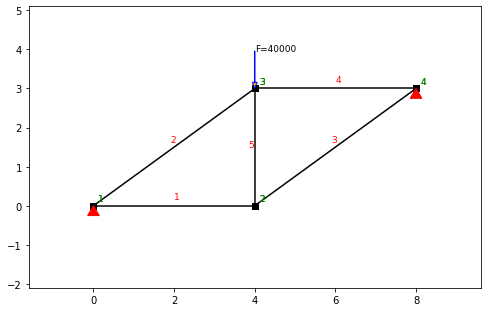

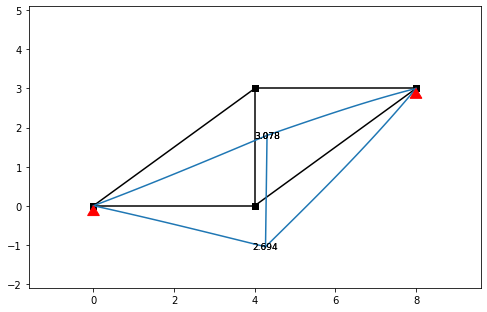

Nó A: 
Deslocamento em x= 0.0
Deslocamento em y= -0.0 
phi_y = 0.6151754213707528

Nó B: 
Deslocamento em x= 0.6642785390310124
Deslocamento em y= -2.6109997840696457 
phi_y = 0

Nó C: 
Deslocamento em x= 0.7579436831912099
Deslocamento em y= -2.982837647371778 
phi_y = 0

Nó D: 
Deslocamento em x= 0.0
Deslocamento em y= -0.0 
phi_y = -0.6353822910837981



In [ ]:
# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
from anastruct import SystemElements

E, A = 150000,1
ss = SystemElements(EA=E*A)

# Define e posiciona os nós da estrutura
node={"A":(0,0), "B":(4,0), "C":(4,3), "D":(8,3)}

# # Define as conectividades/membros entre os nós
ss.add_element(location=[node['A'], node['B']], spring={2:0})
ss.add_element(location=[node['A'], node['C']], spring={2:0})
ss.add_element(location=[node['D'], node['B']], spring={2:0})
ss.add_element(location=[node['D'], node['C']], spring={2:0})
ss.add_element(location=[node['B'], node['C']], spring={1:0, 2:0})

# Adiciona os suportes fixos
node_id = ss.find_node_id(node['A'])
ss.add_support_hinged(node_id=node_id)
node_id = ss.find_node_id(node['D'])
ss.add_support_hinged(node_id=node_id)

#Adiciona a carga pontual
F=-40000 #=-40kn
node_C = ss.find_node_id(node['C'])
ss.point_load(node_id=node_C, Fy=F, rotation=0) # Add um carregamento ao nó "C" da estrutura

ss.solve()

ss.show_structure(scale=0.7, figsize=(7, 4.5), offset=(0, 0))
ss.show_displacement(scale=0.7, figsize=(7,4.5), offset=(0,0))
print("Nó A: \nDeslocamento em x= " + str(ss.get_node_displacements()[0][1]) + "\nDeslocamento em y= " + str(ss.get_node_displacements()[0][2]), "\nphi_y = " + str(ss.get_node_displacements()[0][3]) + "\n")
print("Nó B: \nDeslocamento em x= " + str(ss.get_node_displacements()[1][1]) + "\nDeslocamento em y= " + str(ss.get_node_displacements()[1][2]), "\nphi_y = " + str(ss.get_node_displacements()[1][3]) + "\n")
print("Nó C: \nDeslocamento em x= " + str(ss.get_node_displacements()[2][1]) + "\nDeslocamento em y= " + str(ss.get_node_displacements()[2][2]), "\nphi_y = " + str(ss.get_node_displacements()[2][3]) + "\n")
print("Nó D: \nDeslocamento em x= " + str(ss.get_node_displacements()[3][1]) + "\nDeslocamento em y= " + str(ss.get_node_displacements()[3][2]), "\nphi_y = " + str(ss.get_node_displacements()[3][3]) + "\n")